#Loading libraries

In [59]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from statsmodels.tools.eval_measures import rmse
from fbprophet.plot import add_changepoints_to_plot

#Loading Data

In [43]:
#Loading data
data = pd.read_csv('/content/HospitalityEmployees.csv')

#Checking Data

In [44]:
#Checking data
data

,Date,Employees
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7
...,...,...
343,8/1/2018,2019.1
344,9/1/2018,1992.5
345,10/1/2018,1984.3
346,11/1/2018,1990.1


#Checking data info

In [45]:
#Checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       348 non-null    object 
 1   Employees  348 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.6+ KB


Date have object data type

#Changing the columns names

In [47]:
#Changing the name of columns
data.columns = ['ds', 'y']

#Changing data type of date as datetime format

In [48]:
#Changing the date into datetime
data['ds'] = pd.to_datetime(data['ds'])

In [49]:
#Checking the data type
data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

#Plotting the data

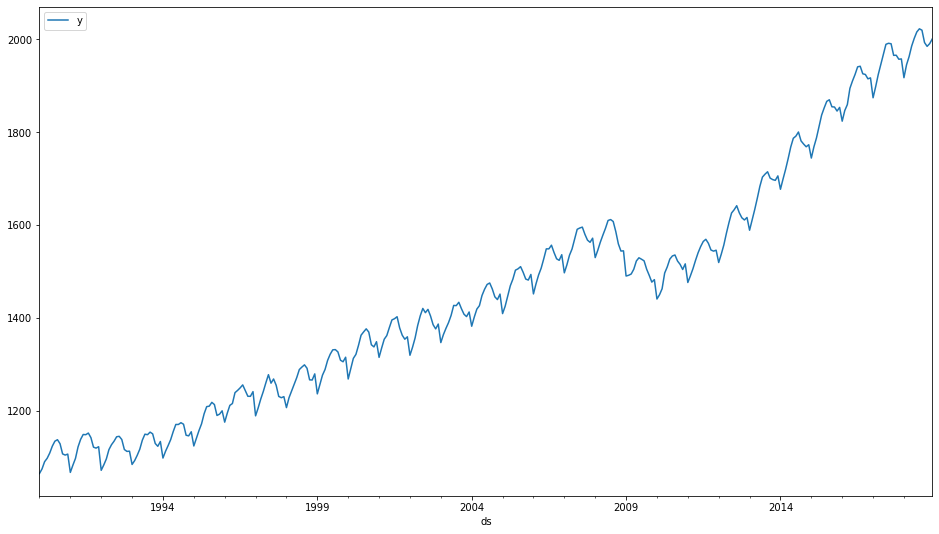

In [50]:
#Plotting the data
data.plot(x = 'ds', y = 'y', figsize = (16,9));

#Creating Facebook Prophet Model

In [52]:
#Creating facebook prophat model with default parameters
m = Prophet()

#Fitting the model
m.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#Forecasting on the model on next 12 months

In [53]:
#Creating dataframe for period
future = m.make_future_dataframe(periods=12, freq = 'MS')

#Forecasting on the data
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-01-01,1107.316010,1047.084180,1071.568184,1107.316010,1107.316010,-47.658164,-47.658164,-47.658164,-47.658164,-47.658164,-47.658164,0.0,0.0,0.0,1059.657847
1,1990-02-01,1107.822239,1063.242196,1087.028750,1107.822239,1107.822239,-33.212236,-33.212236,-33.212236,-33.212236,-33.212236,-33.212236,0.0,0.0,0.0,1074.610003
2,1990-03-01,1108.279478,1077.866574,1102.644108,1108.279478,1108.279478,-18.721698,-18.721698,-18.721698,-18.721698,-18.721698,-18.721698,0.0,0.0,0.0,1089.557780
3,1990-04-01,1108.785707,1092.358631,1117.988221,1108.785707,1108.785707,-3.062905,-3.062905,-3.062905,-3.062905,-3.062905,-3.062905,0.0,0.0,0.0,1105.722802
4,1990-05-01,1109.275605,1110.327640,1135.256279,1109.275605,1109.275605,13.275589,13.275589,13.275589,13.275589,13.275589,13.275589,0.0,0.0,0.0,1122.551194


In [54]:
#Extracting columns
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [55]:
#Displaying 'ds', 'yhat_lower', 'yhat_upper', 'yhat'
forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,1990-01-01,1047.084180,1071.568184,1059.657847
1,1990-02-01,1063.242196,1087.028750,1074.610003
2,1990-03-01,1077.866574,1102.644108,1089.557780
3,1990-04-01,1092.358631,1117.988221,1105.722802
4,1990-05-01,1110.327640,1135.256279,1122.551194
...,...,...,...,...
355,2019-08-01,2099.142778,2127.391675,2112.941487
356,2019-09-01,2088.613482,2118.403193,2102.812968
357,2019-10-01,2074.455686,2105.457967,2089.628098
358,2019-11-01,2072.969896,2102.712428,2087.952617


#Visualizing the Actual data vs Forecast data

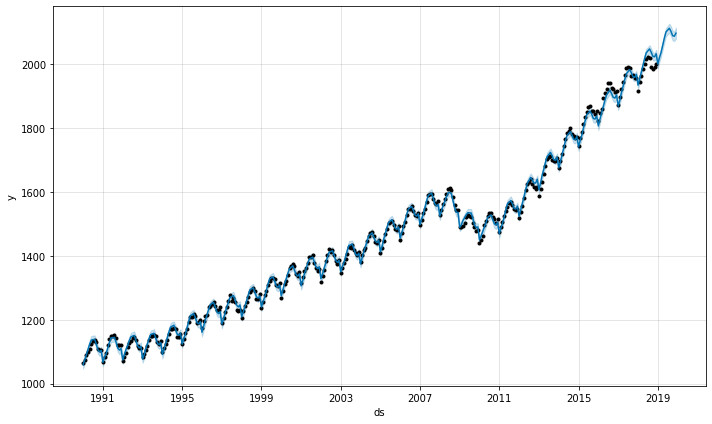

In [56]:
#Plotting data
m.plot(forecast);

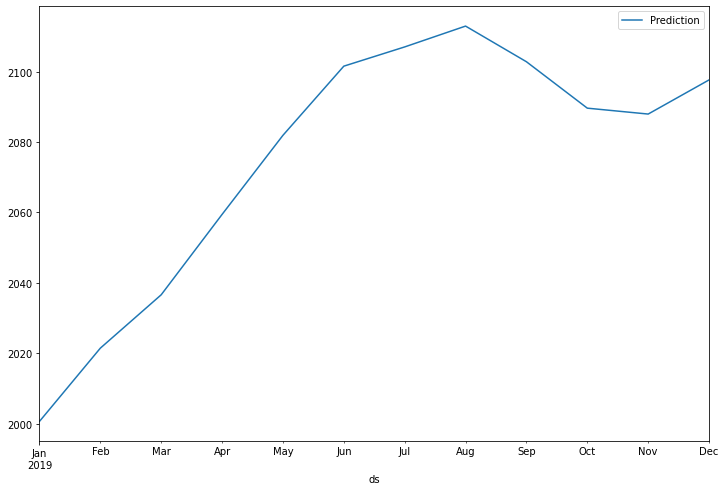

In [73]:
#Plotting actual and forecast
ax = forecast.iloc[-12:].plot(x = 'ds',
                   y = 'yhat',
                   label = 'Prediction',
                   legend = True,
                   figsize = (12,8));
                  

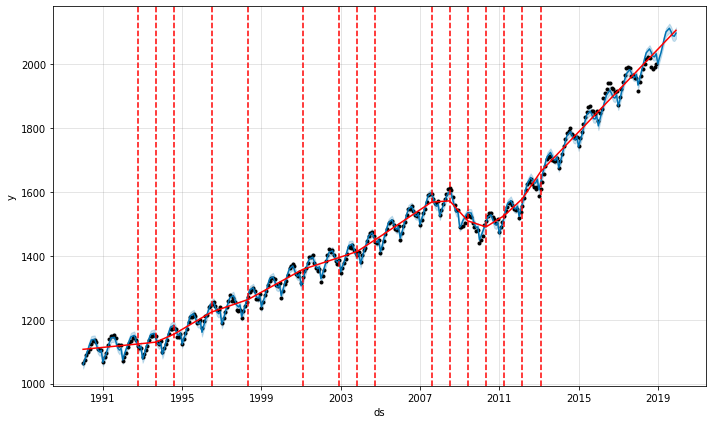

In [62]:
#Plotting data with changing trend plots  
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast);